In [2]:
import pandas as pd
import numpy as np

In [10]:
data = pd.read_csv("data.csv")
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16714    False
16715    False
16716    False
16717    False
16718    False
Length: 16719, dtype: bool

In [12]:
data.drop_duplicates()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
missing_count = data.isnull().sum()
print(missing_count)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [14]:
total_data = np.product(data.shape)

total_missing = missing_count.sum()

percentage = (total_missing/total_data) * 100

print(round(percentage, 2),'%')

17.46 %


In [15]:
dataset = pd.DataFrame(data.fillna(0))

dataset.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.0,0.0,0,0.0,0,0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.0,0.0,0,0.0,0,0


In [16]:
# Check if you have any missing values in the new dataset (the one created in 3.8). 
dataset.isnull().values.sum()

0

In [17]:
print("Unique values:",dataset['Rating'].unique())

print("Unique values:",dataset['Genre'].unique())

print("Unique values:",dataset['Platform'].unique())

dataset = dataset.drop(['Publisher', 'Name', 'Developer'], axis=1)

#print("Unique values:",dataset['Publisher'].unique())

Unique values: ['E' 0 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
Unique values: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' 0]
Unique values: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [18]:
dataset = dataset.replace(['E', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],[1, 18, 15, 10, 2, 20, 3, -1])
dataset = dataset.replace(['Sports','Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Shooter',
 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy'],
                         [1,2,3,4,5,6,7,8,9,10,11,12])
num_list = [*range(1,len(dataset['Platform'].unique())+1)]
dataset = dataset.replace([i for i in dataset['Platform'].unique()], [j for j in num_list])

dataset[20:30]

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
20,4,2006.0,4,6.38,4.46,6.04,1.36,18.25,0.0,0.0,0,0.0,0
21,3,1989.0,2,10.83,2.71,4.18,0.42,18.14,0.0,0.0,0,0.0,0
22,2,1988.0,2,9.54,3.44,3.84,0.46,17.28,0.0,0.0,0,0.0,0
23,5,2013.0,9,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,18
24,7,2002.0,9,8.41,5.49,0.47,1.78,16.15,95.0,62.0,8.7,730.0,18
25,9,2002.0,4,6.06,3.90,5.38,0.50,15.85,0.0,0.0,0,0.0,0
26,4,2005.0,5,3.43,5.35,5.32,1.18,15.29,77.0,37.0,7.1,19.0,1
27,4,2010.0,4,5.51,3.17,5.65,0.80,15.14,0.0,0.0,0,0.0,0
28,7,2001.0,3,6.85,5.09,1.87,1.16,14.98,95.0,54.0,8.4,314.0,1
29,5,2011.0,7,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.4,8713.0,18


In [19]:
'''data[:, :-1], data[:, -1]'''

X = dataset.iloc[:,:2]
Y = dataset.iloc[:,2]
print(X)
print(Y)

       Platform  Year_of_Release
0             1           2006.0
1             2           1985.0
2             1           2008.0
3             1           2009.0
4             3           1996.0
...         ...              ...
16714         6           2016.0
16715         5           2006.0
16716        23           2016.0
16717         9           2003.0
16718        23           2016.0

[16719 rows x 2 columns]
0         1
1         2
2         3
3         1
4         4
         ..
16714     9
16715     1
16716    11
16717     2
16718     8
Name: Genre, Length: 16719, dtype: int64


# Outliers

In [58]:
from itertools import chain
l = chain.from_iterable(zip(*X))
results, names
print(X)
for i in range(len(X)):
        for j in range(len(X[i])):
                print(X[i][j])
#for name, value in X:
#	scores = name
#	results.append(scores)
#	names.append(name)
#	print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

       Platform  Year_of_Release
0             1           2006.0
1             2           1985.0
2             1           2008.0
3             1           2009.0
4             3           1996.0
...         ...              ...
16714         6           2016.0
16715         5           2006.0
16716        23           2016.0
16717         9           2003.0
16718        23           2016.0

[16719 rows x 2 columns]


KeyError: 0

In [56]:
for name,data in X:
    print(name)

ValueError: too many values to unpack (expected 2)

ValueError: Dimensions of labels and X must be compatible

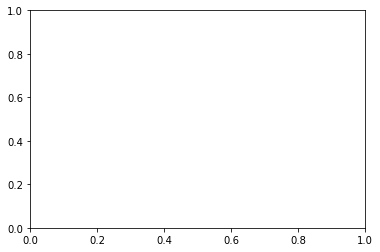

In [24]:
# plot model performance for comparison
import matplotlib.pyplot as plt

plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1, stratify=Y)

print('Labels counts in y: {}'.format(np.bincount(Y)))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [   2 2348  888 1249 1500  580 1750 1323  874 3370  849 1303  683]
Labels counts in y_train: [   2 2113  799 1124 1350  522 1575 1191  786 3033  764 1173  615]
Labels counts in y_test: [  0 235  89 125 150  58 175 132  88 337  85 130  68]


In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15047, 2)
(1672, 2)
(15047,)
(1672,)


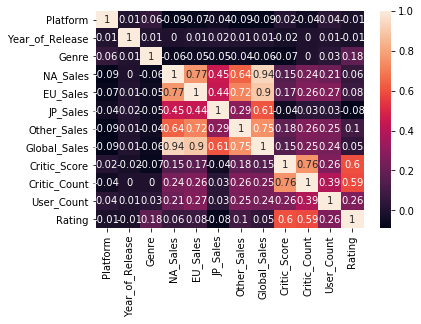

In [41]:
import seaborn as sns
correlation_matrix = dataset.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [42]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(dataset))
print(z)

TypeError: can only concatenate str (not "int") to str

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
x1_min, x1_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
x2_min, x2_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

In [45]:
# model evaluation for training set
y_train_predict = lin_model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 3.4129376456465295
R2 score is 0.0036945766549822956


The model performance for testing set
--------------------------------------
RMSE is 3.415405024669766
R2 score is 0.0015563207544690982


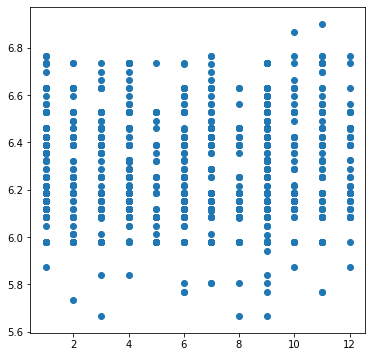

In [46]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_predict)
plt.show()

0.2085538409043268
0.0018730323896675172


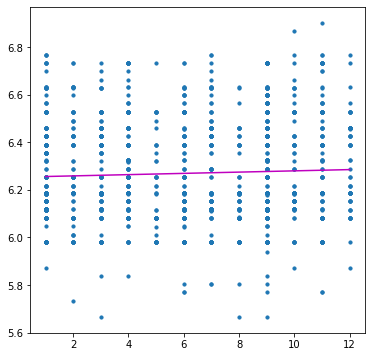

In [47]:
import operator

from sklearn.preprocessing import PolynomialFeatures

x = y_test
y = y_test_predict

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=1)
polynomial_features_quadratic = PolynomialFeatures(degree=2)
polynomial_features_cubic = PolynomialFeatures(degree=3)

x_poly = polynomial_features.fit_transform(x)
x_quad = polynomial_features_quadratic.fit_transform(x)
x_cubic = polynomial_features_cubic.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.figure(figsize=(6,6))

plt.scatter(x, y, s=10)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')

In [48]:
dataset.columns

Index(['Platform', 'Year_of_Release', 'Genre', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating'],
      dtype='object')

In [49]:
print("These are nominal attributes")
print(dataset['Platform'], dataset['Genre'],dataset['Year_of_Release']) #5.a.1

These are nominal attributes
0         1
1         2
2         1
3         1
4         3
         ..
16714     6
16715     5
16716    23
16717     9
16718    23
Name: Platform, Length: 16719, dtype: int64 0         1
1         2
2         3
3         1
4         4
         ..
16714     9
16715     1
16716    11
16717     2
16718     8
Name: Genre, Length: 16719, dtype: int64 0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16714    2016.0
16715    2006.0
16716    2016.0
16717    2003.0
16718    2016.0
Name: Year_of_Release, Length: 16719, dtype: float64


In [64]:
print("Mean for User_Score")
print(dataset['Global_Sales'].mean()) #5.b.1
print("Range of Eu_sales:", dataset['EU_Sales'].max()-dataset['EU_Sales'].min())#5.c.1

Mean for User_Score
0.5335426759973684
Range of Eu_sales: 28.96
